Importing necessary libraries

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [317]:
data=pd.read_csv('/content/train_exit.csv')
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


**EDA**

In [318]:
#identifying columns
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [319]:
#shape of data
data.shape

(13994, 30)

In [320]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [321]:
#creating a copy of the data
data_copy=data.copy()

In [322]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [323]:
# Define a function to convert height to inches
def convert_height_to_inches(height):
    try:
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches.replace('"', ''))
        return feet * 12 + inches
    except:
        return np.nan

# Apply the function to the height column
data['height'] = data['height'].apply(convert_height_to_inches)

In [324]:
data['height'].dtypes

dtype('int64')

In [325]:
# Define a function to convert weight to float
def convert_weight_to_lbs(weight):
    try:
        return float(weight.replace('lbs', '').strip())
    except:
        return np.nan

In [326]:
data['weight'] = data['weight'].apply(convert_weight_to_lbs)

In [327]:
data['weight'].dtypes

dtype('float64')

In [328]:

# Check
print(data[['height', 'weight']].dtypes)

height      int64
weight    float64
dtype: object


In [329]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,74,176.0,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,70,148.0,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,74,172.0,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,71,165.0,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,68,158.0,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  int64  
 6   weight                     13577 non-null  float64
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [331]:
data['strong_foot'].unique()

array(['Right', 'Any', 'Left', nan], dtype=object)

In [332]:
data['coaching'].unique()

array(['Talent Hunt', 'Source', 'Academy', 'Unknown', nan], dtype=object)

In [333]:
data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [334]:
data['country'].unique()

array(['Ukraine', 'Russia', 'Spain', 'Chile', 'Argentina', 'Guinea',
       'China PR', 'United States', 'Italy', 'Belgium', 'Germany',
       'England', 'Colombia', 'Brazil', 'France', 'Netherlands',
       'Afghanistan', 'Sweden', 'Switzerland', 'Ghana', 'Poland',
       'Iceland', 'Bulgaria', 'Mexico', 'Northern Ireland', 'Uruguay',
       'Ivory Coast', 'Portugal', 'New Zealand', 'Norway',
       'Korea Republic', 'Scotland', 'Greece', 'Denmark', 'Slovakia',
       'Japan', 'Togo', 'Slovenia', 'Finland', 'Australia', 'Paraguay',
       'Republic of Ireland', 'Croatia', 'Saudi Arabia', 'Wales',
       'Czech Republic', 'Austria', 'Georgia', 'Gabon', 'Turkey',
       'Madagascar', 'Serbia', 'Congo', 'Tunisia', 'Canada', 'Senegal',
       'Thailand', 'Kosovo', 'Israel', 'Montserrat', 'Guatemala',
       'Algeria', 'Iraq', 'South Africa', 'Albania', 'Hungary',
       'Honduras', 'Morocco', 'Romania', 'Mali', 'Bosnia Herzegovina',
       'Ecuador', 'DR Congo', 'Burkina Faso', 'Peru', 'K

In [335]:
#finding if there is missing values
data.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection     

Visualisatons


In [336]:
#filter missing value columns
missing_val_col=data.columns[data.isnull().any()]
missing_val_col

Index(['gender', 'weight', 'ball_controlling_skills', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'shot_accuracy',
       'strong_foot', 'behaviour_rating', 'matches_played', 'fitness_rating',
       'coaching', 'years_of_experience'],
      dtype='object')

In [337]:
# Filter only numeric columns with missing values
missing_val_col_num = data[missing_val_col].select_dtypes(include=np.number).columns
missing_val_col_num

Index(['weight', 'ball_controlling_skills', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'shot_accuracy',
       'behaviour_rating', 'matches_played', 'fitness_rating',
       'years_of_experience'],
      dtype='object')

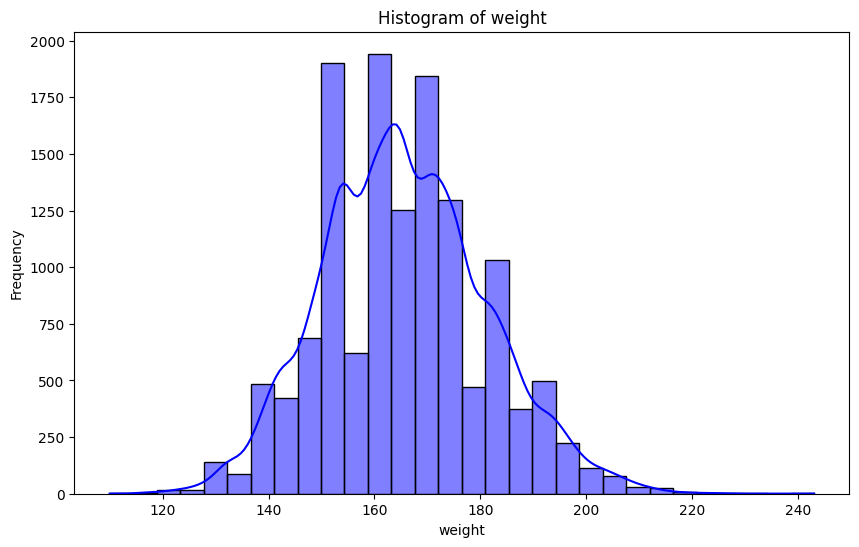

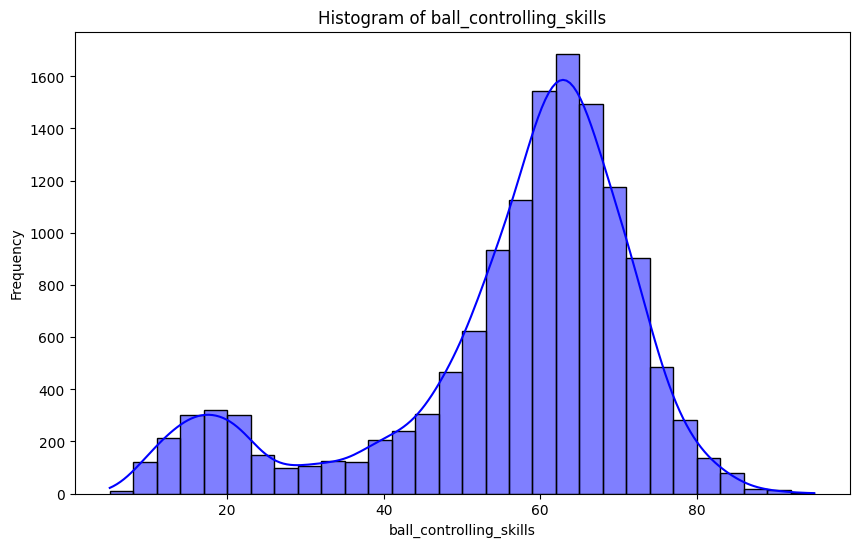

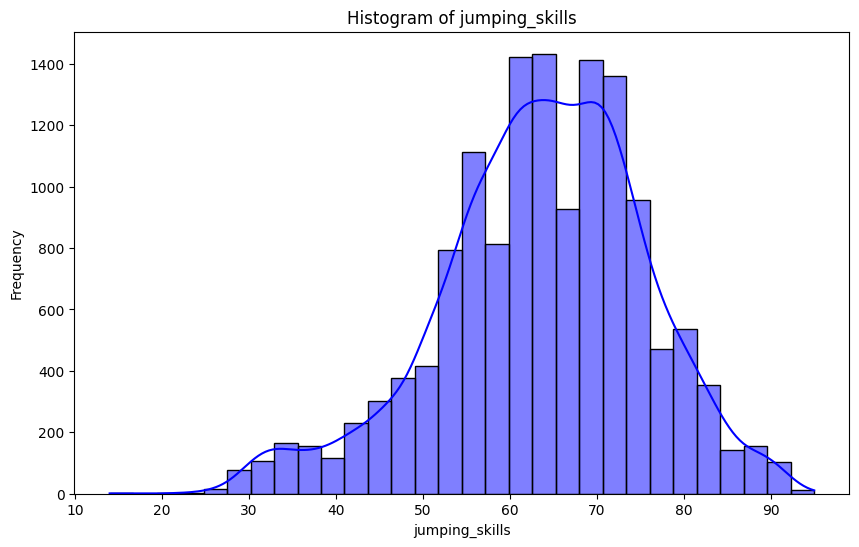

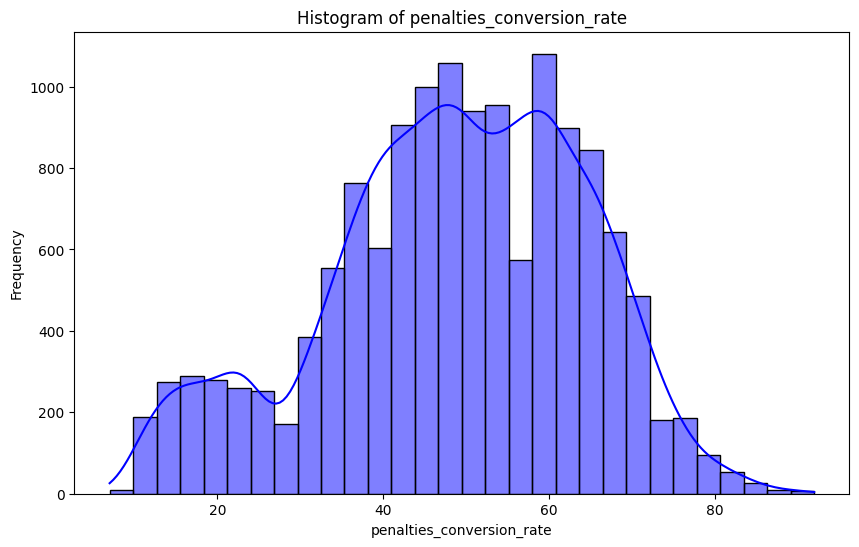

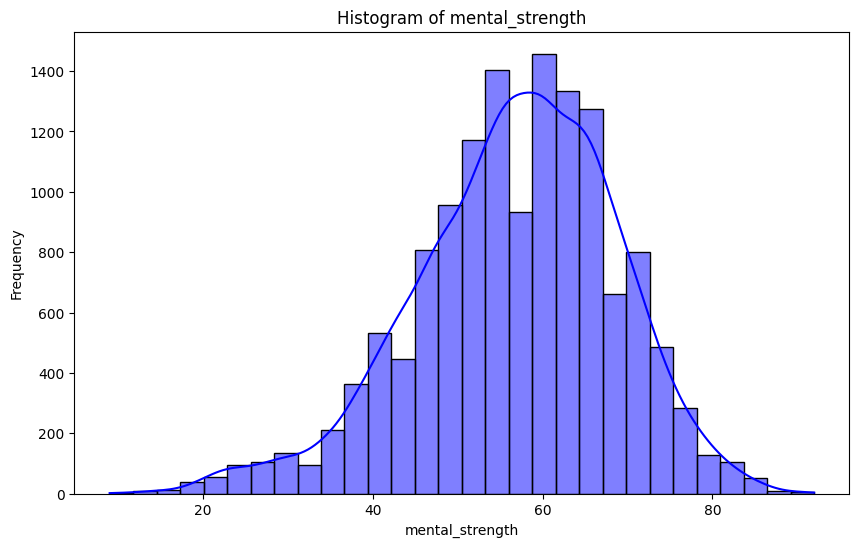

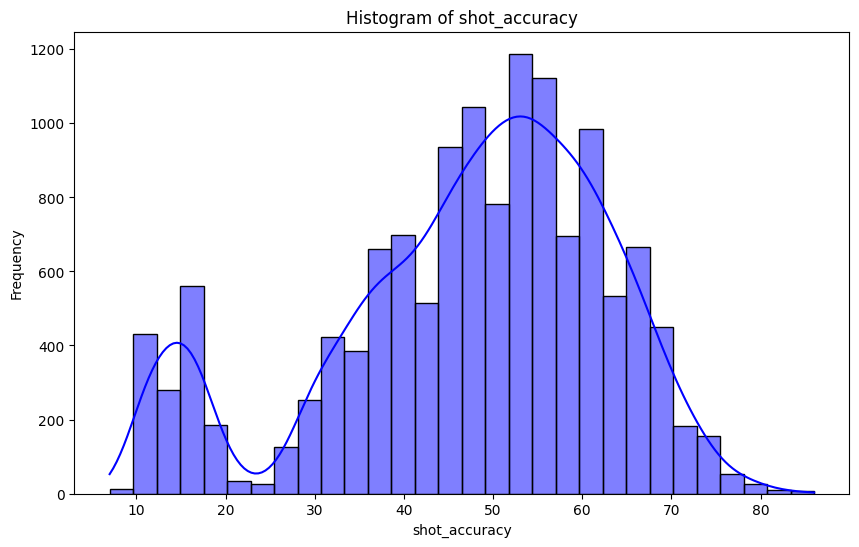

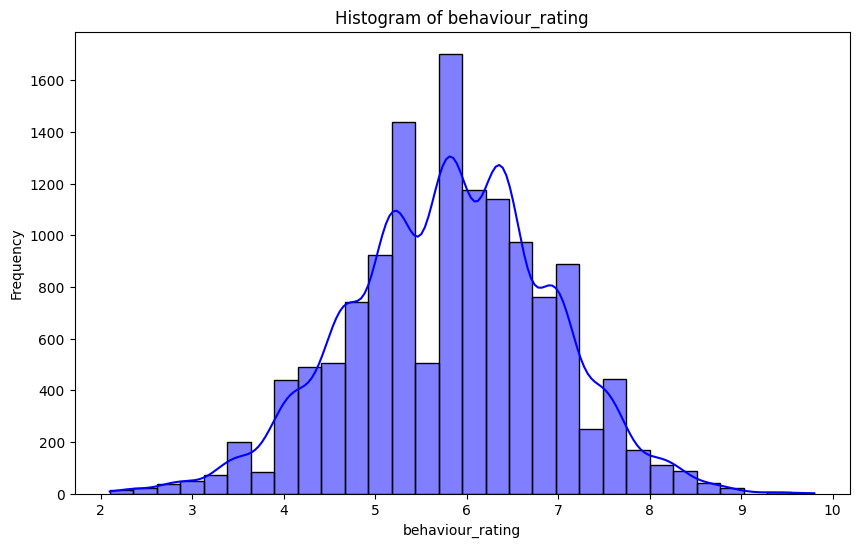

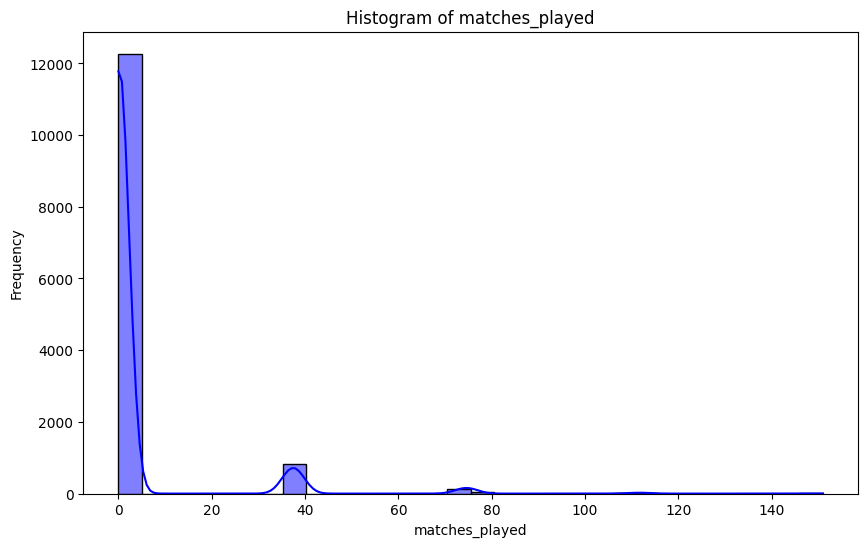

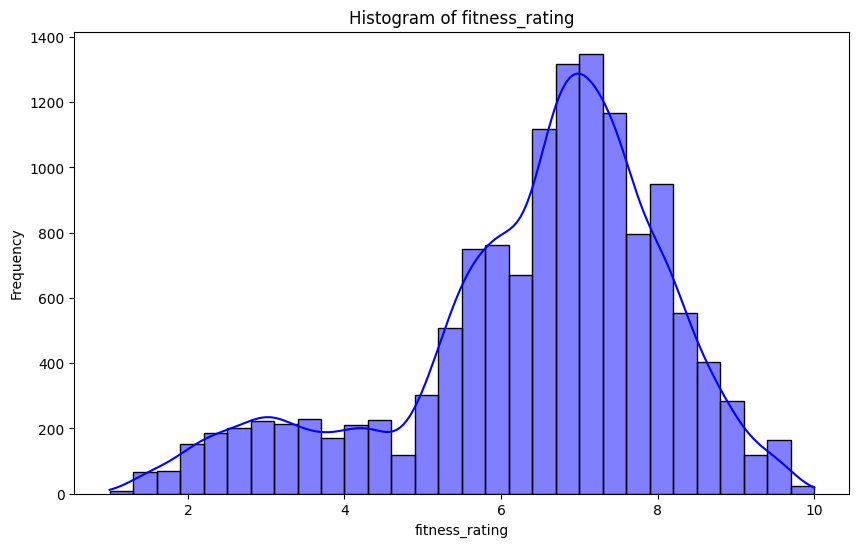

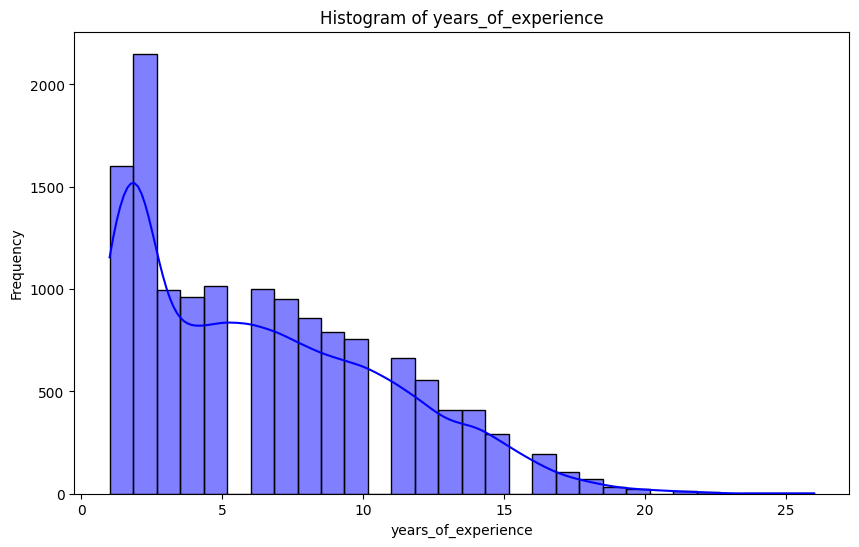

In [338]:
# Plot histograms for each column with missing values
for col in missing_val_col_num:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col],kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

Preprocessing

Missing values

In [339]:
# Fill missing values in these columns with the median of each column
for col in missing_val_col_num:
    data[col].fillna(data[col].median(), inplace=True)


In [340]:
data.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                          0
ball_controlling_skills         0
body_reflexes                   0
body_balance                    0
jumping_skills                  0
penalties_conversion_rate       0
mental_strength                 0
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                   0
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating                0
matches_played                  0
fitness_rating                  0
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience             0
no_of_disqualifications         0
selection     

In [341]:
missing_val_col_obj = data[missing_val_col].select_dtypes(include='object').columns
missing_val_col_obj

Index(['gender', 'strong_foot', 'coaching'], dtype='object')

In [342]:
# Fill missing values in these columns with the mode of each column
for col in missing_val_col_obj:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [343]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

Outliers

In [344]:
# Identify numeric columns
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills', 'defending_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won',
       'years_of_experience', 'no_of_disqualifications', 'selection'],
      dtype='object')

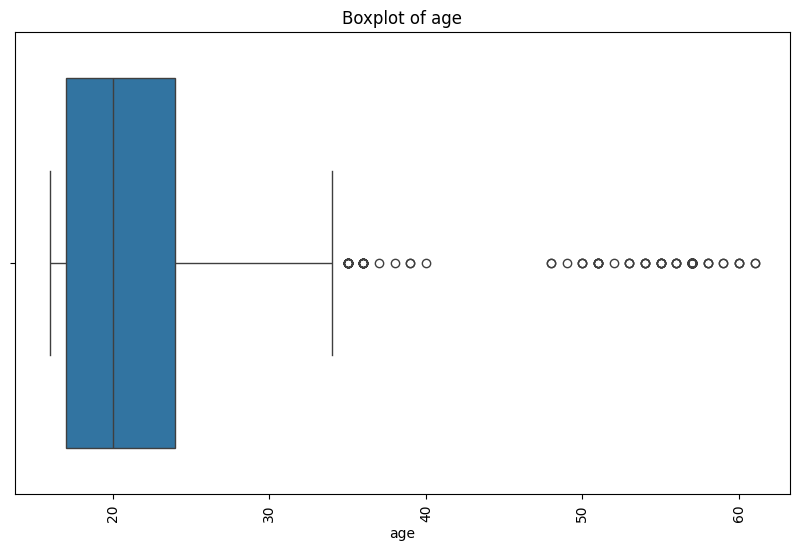

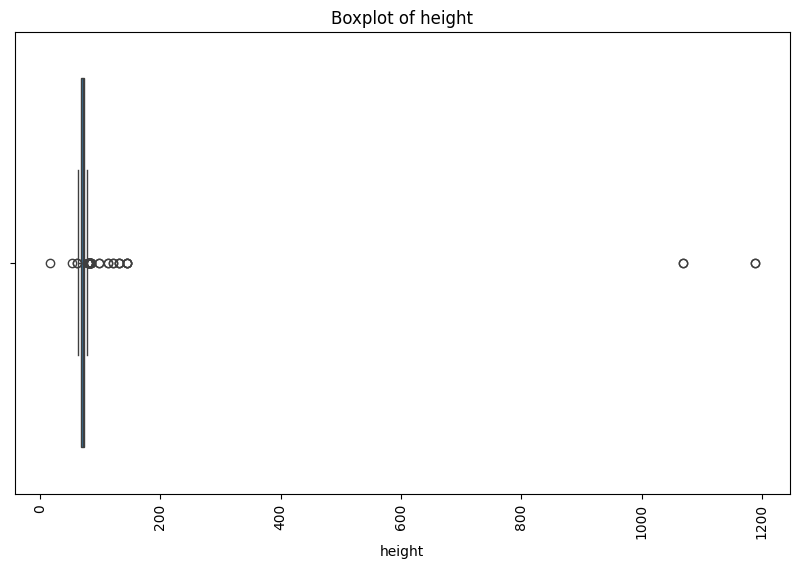

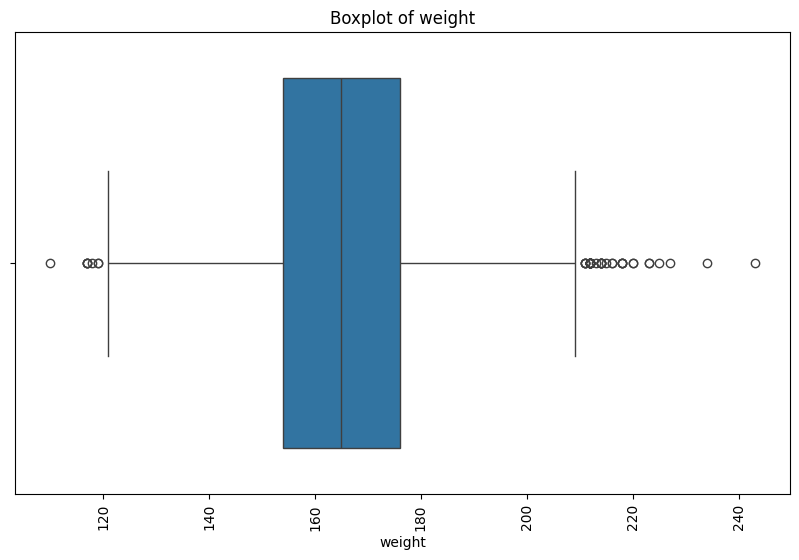

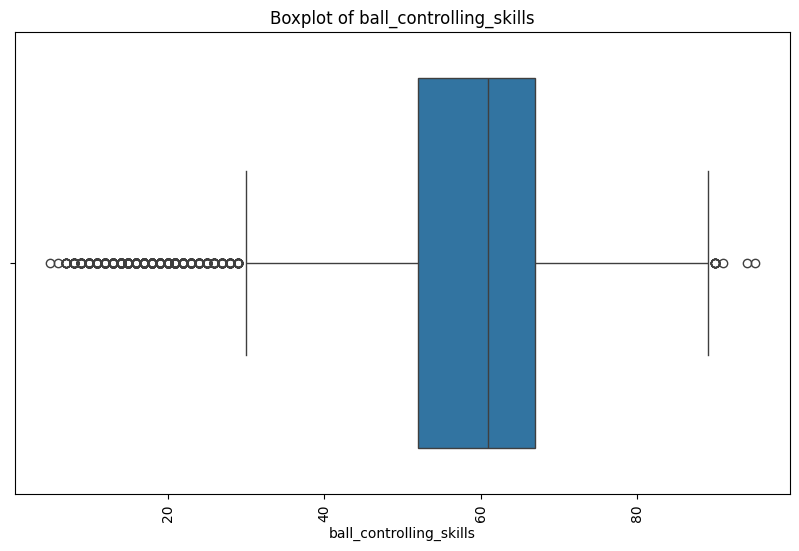

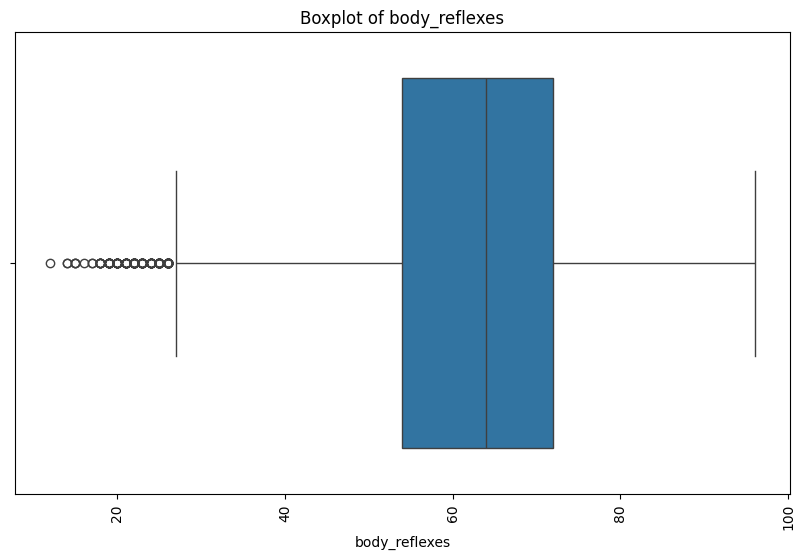

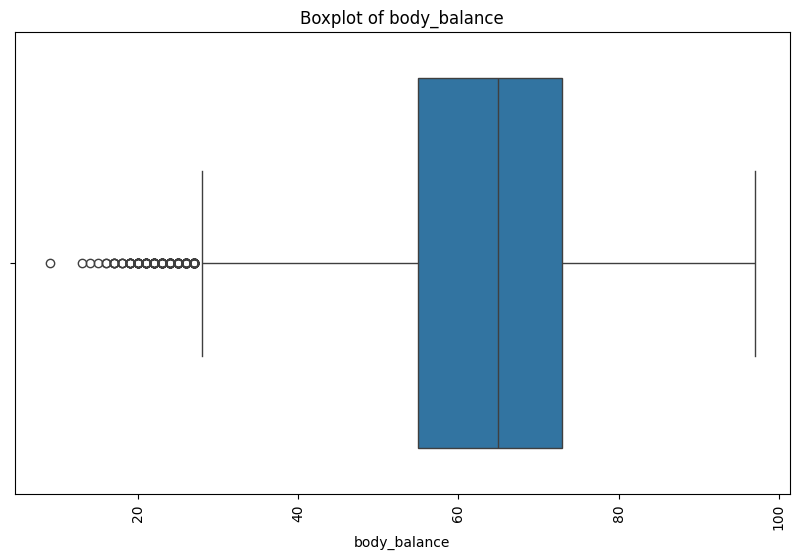

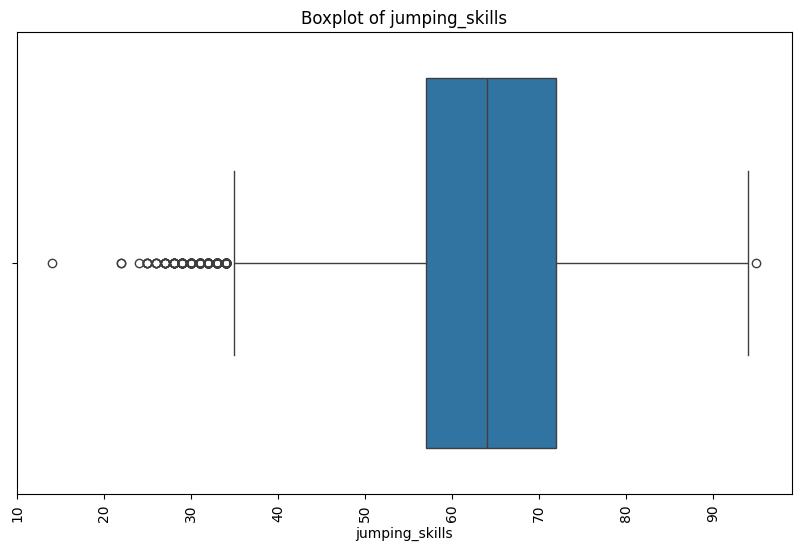

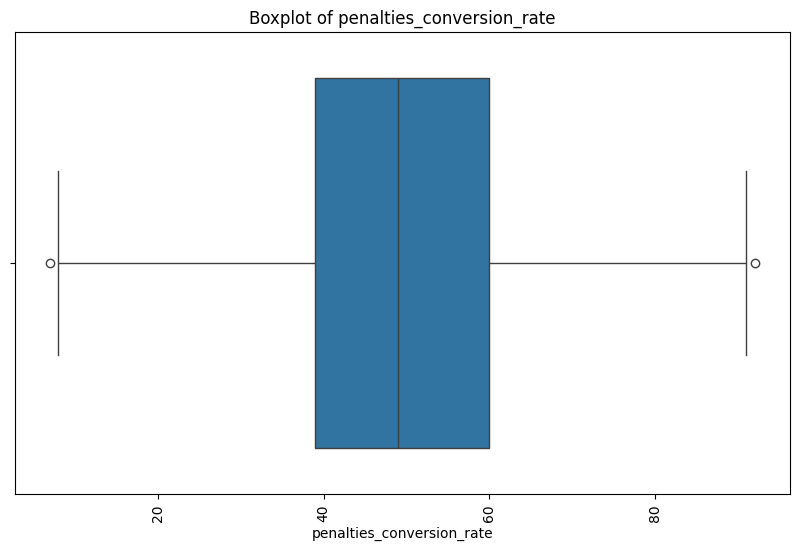

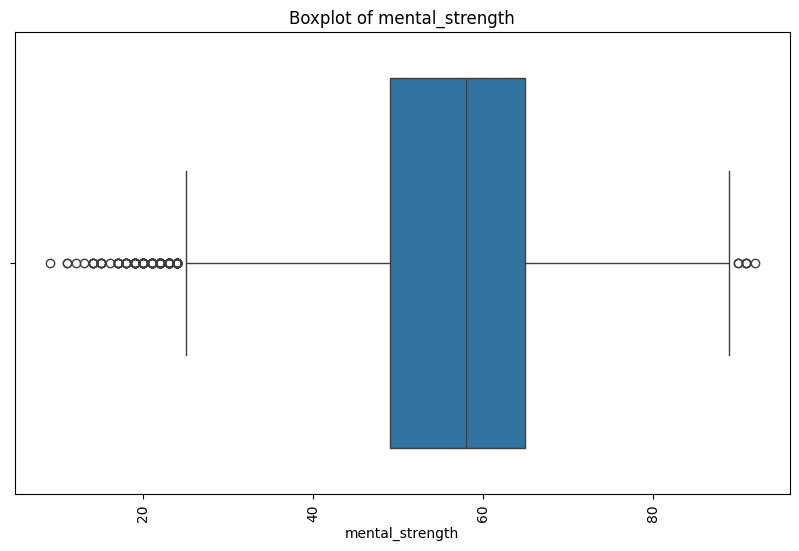

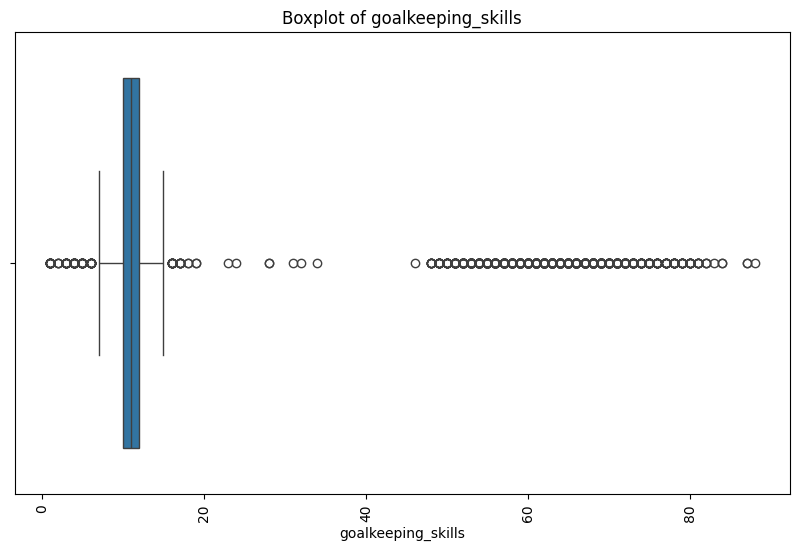

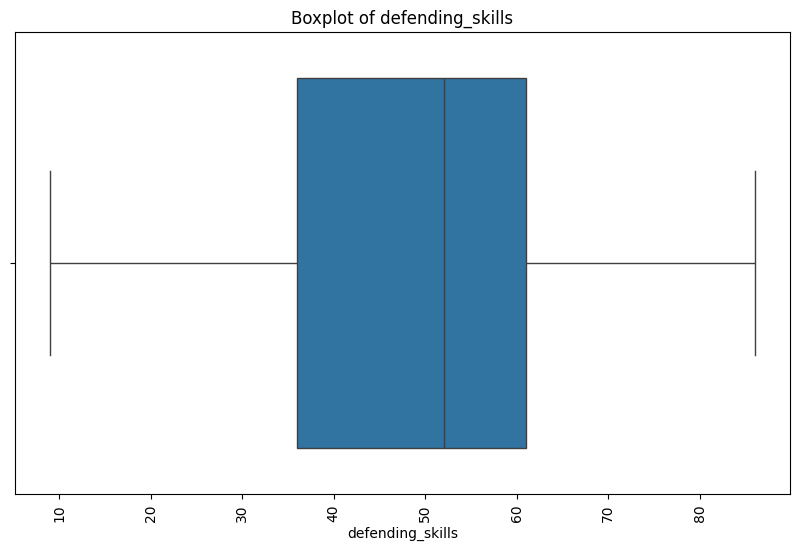

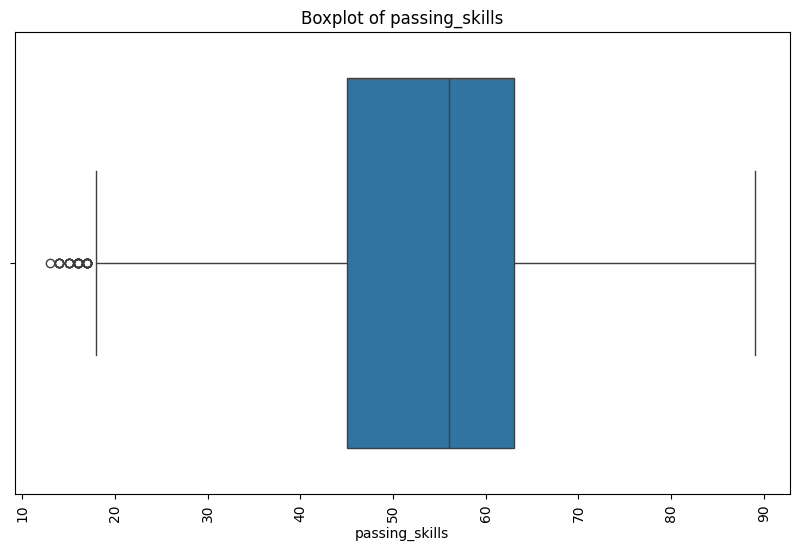

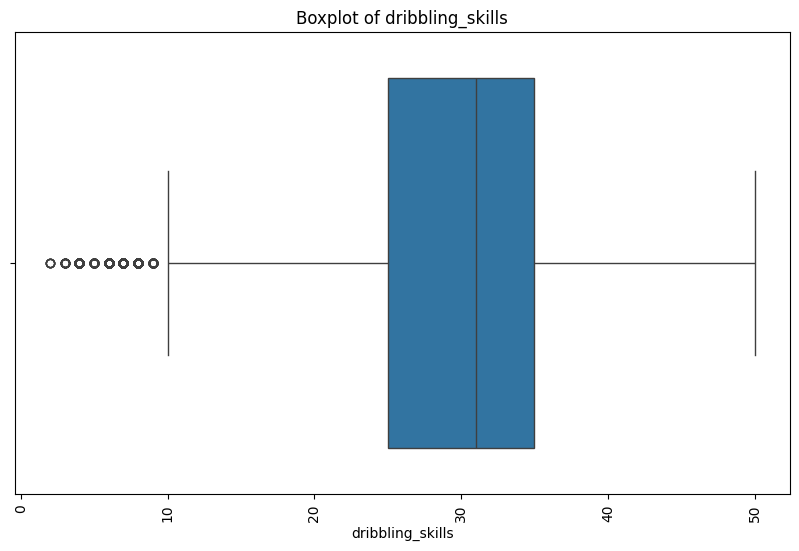

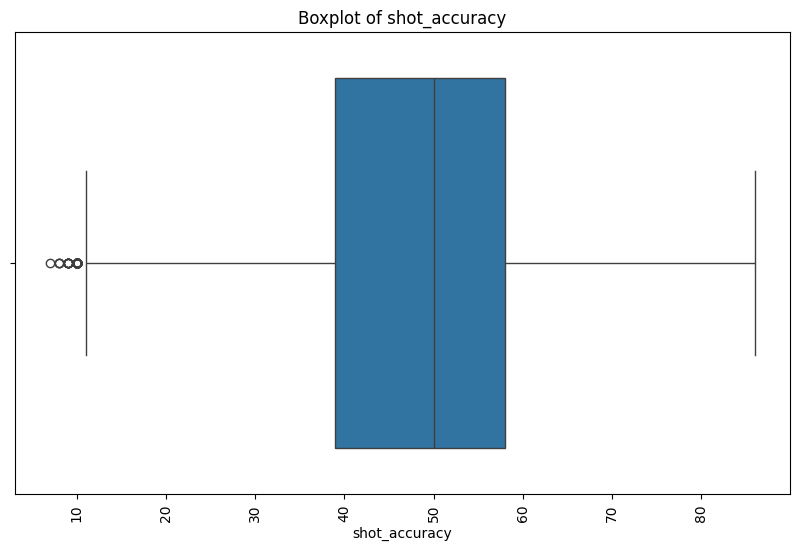

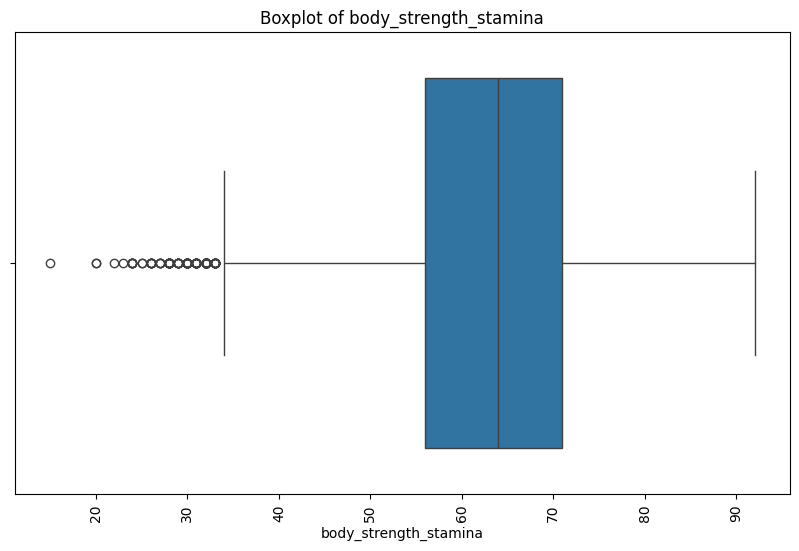

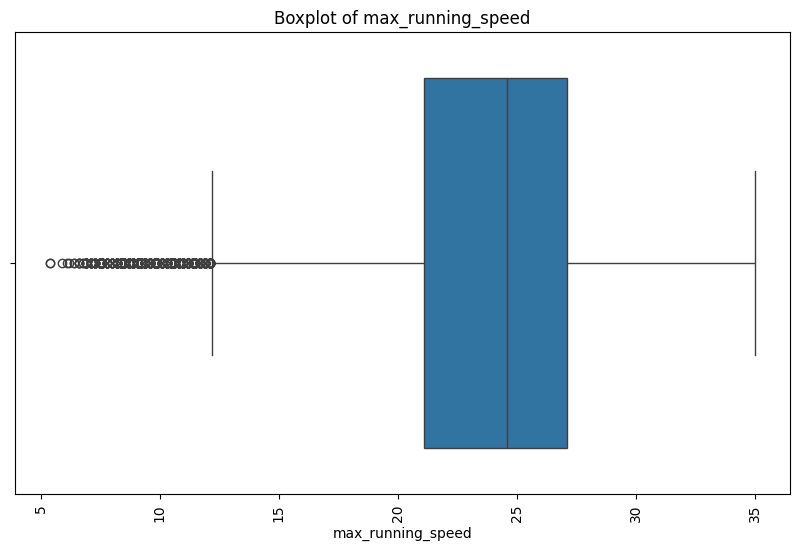

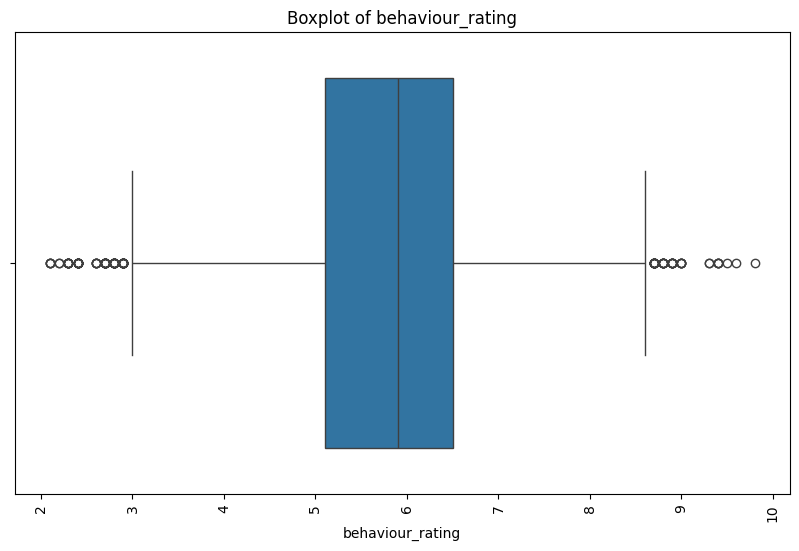

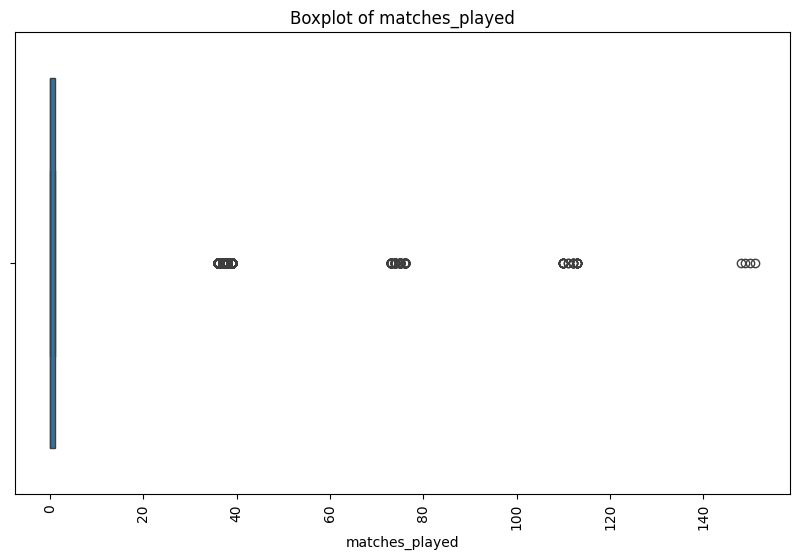

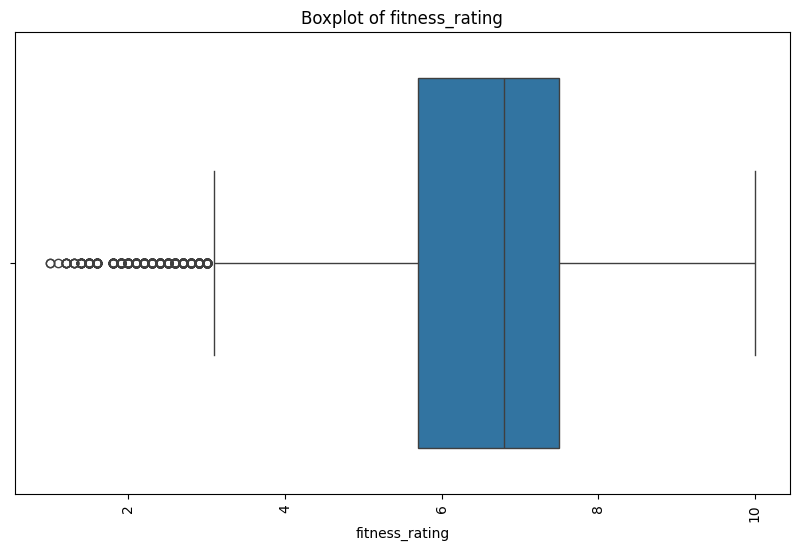

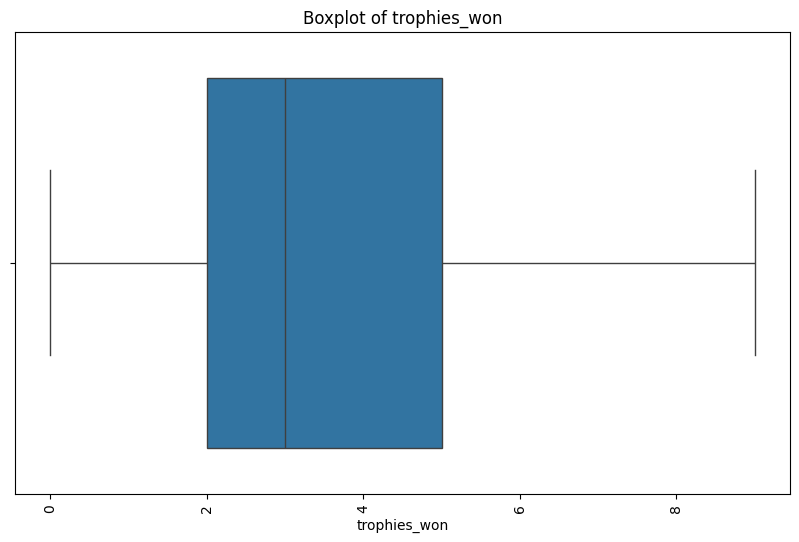

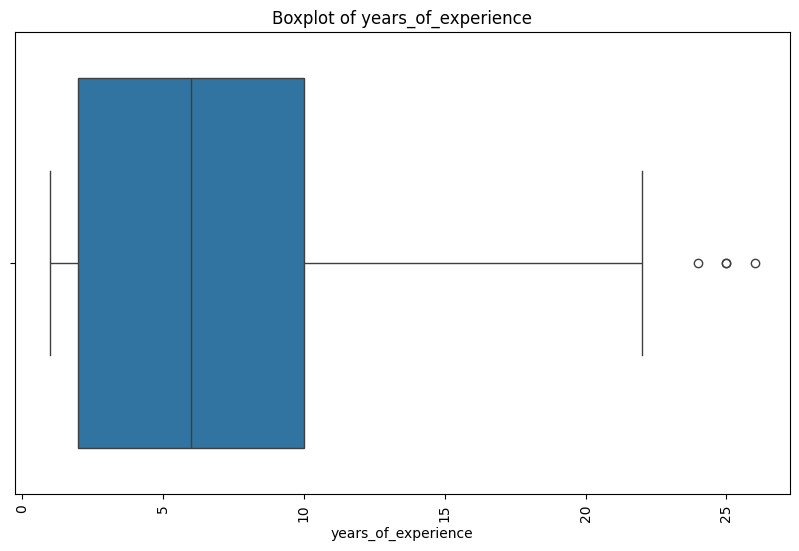

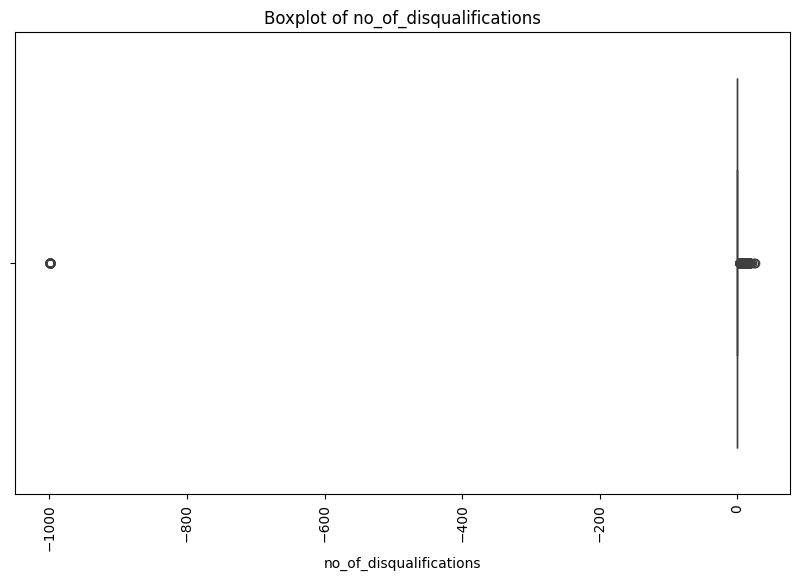

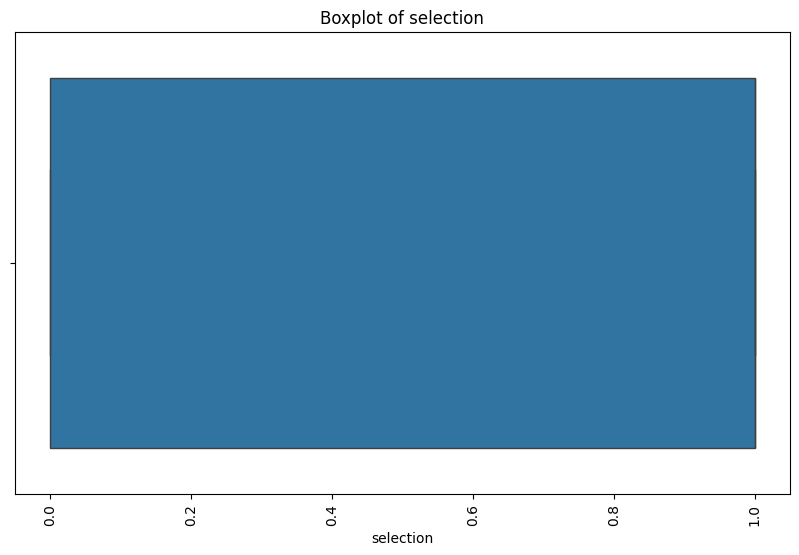

In [345]:
# Loop through each numeric column and create a boxplot
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [346]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [347]:
data['no_of_disqualifications'].value_counts()

no_of_disqualifications
 0.0      12818
 4.0        424
 5.0        236
 6.0        209
-999.0       73
 12.0        56
 8.0         56
 9.0         51
 10.0        47
 18.0         9
 16.0         4
 14.0         3
 13.0         3
 15.0         2
 24.0         1
 25.0         1
 21.0         1
Name: count, dtype: int64

In [348]:
data = data[data['no_of_disqualifications'] != -999]

In [349]:
features=['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating',
       'years_of_experience', 'no_of_disqualifications']

In [350]:
#outliers are not deleted,instead apply sqrttransformation to reduce impact of outlier

In [351]:

# Ensure no negative values before applying square root transformation
data[features] = data[features].apply(lambda x: x + 1e-9 if x.min() < 0 else x)

# Apply square root transformation
data[features] = np.sqrt(data[features])

# Verify the transformation
print(data[features].head())

        age    height     weight  ball_controlling_skills  body_reflexes  \
0  4.795832  8.602325  13.266499                 8.774964       7.615773   
1  4.242641  8.366600  12.165525                 7.348469       8.306624   
2  4.000000  8.602325  13.114877                 5.830952       6.557439   
3  5.196152  8.426150  12.845233                 8.888194       8.544004   
4  4.358899  8.246211  12.569805                 6.855655       7.810250   

   body_balance  jumping_skills  penalties_conversion_rate  mental_strength  \
0      6.855655        7.681146                   6.403124         8.544004   
1      8.366600        7.874008                   7.280110         6.557439   
2      6.708204        8.306624                   7.000000         6.708204   
3      8.717798        9.273618                   9.000000         8.944272   
4      8.602325        7.549834                   7.000000         5.916080   

   goalkeeping_skills  passing_skills  dribbling_skills  shot_accura

In [352]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [353]:
#drop unnecessary columns
data.drop(['name','player_id'],axis=1,inplace=True)

In [354]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the Pearson correlation matrix
corr = numeric_data.corr(method="pearson")

# Display the correlation matrix
corr

,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000000,0.020159,0.186891,0.075817,-0.004392,-0.059228,0.146721,0.112428,0.325490,0.079383,...,0.131891,0.219118,-0.125609,0.397101,0.225712,0.079325,0.037541,0.877374,0.236650,-0.172133
height,0.020159,1.000000,0.249967,-0.144671,-0.198761,-0.253060,-0.040479,-0.123179,-0.046496,0.130556,...,-0.128871,0.026400,-0.162951,-0.003347,0.008765,-0.090798,-0.034686,0.027499,0.007214,-0.000563
weight,0.186891,0.249967,1.000000,-0.329572,-0.508832,-0.636988,0.004002,-0.267910,-0.069923,0.333528,...,-0.275245,0.173239,-0.429713,0.070763,0.091119,-0.218957,-0.099146,0.211760,0.089433,-0.013130
ball_controlling_skills,0.075817,-0.144671,-0.329572,1.000000,0.699799,0.608062,0.215549,0.788820,0.672110,-0.815523,...,0.882964,0.573225,0.703302,0.396648,0.165926,0.729020,0.257180,0.095803,0.178248,0.231601
body_reflexes,-0.004392,-0.198761,-0.508832,0.699799,1.000000,0.759291,0.238854,0.600370,0.468089,-0.563388,...,0.668951,0.317027,0.802164,0.277482,0.075062,0.586869,0.234736,0.003466,0.084088,0.158028
body_balance,-0.059228,-0.253060,-0.636988,0.608062,0.759291,1.000000,0.225021,0.526412,0.355370,-0.539679,...,0.564524,0.170710,0.699454,0.157528,0.033237,0.501979,0.197408,-0.062797,0.040339,0.097114
jumping_skills,0.146721,-0.040479,0.004002,0.215549,0.238854,0.225021,1.000000,0.154461,0.261395,-0.208282,...,0.196439,0.399903,0.262809,0.259301,0.106947,0.352099,0.054835,0.163301,0.112361,0.083833
penalties_conversion_rate,0.112428,-0.123179,-0.267910,0.788820,0.600370,0.526412,0.154461,1.000000,0.576880,-0.688534,...,0.869639,0.439584,0.596988,0.327950,0.177122,0.573744,0.245547,0.128877,0.189465,0.168504
mental_strength,0.325490,-0.046496,-0.069923,0.672110,0.468089,0.355370,0.261395,0.576880,1.000000,-0.451850,...,0.664098,0.535835,0.414197,0.618636,0.320348,0.540706,0.225379,0.371244,0.341282,0.307236
goalkeeping_skills,0.079383,0.130556,0.333528,-0.815523,-0.563388,-0.539679,-0.208282,-0.688534,-0.451850,1.000000,...,-0.766016,-0.560575,-0.651739,-0.089689,-0.012782,-0.720056,-0.177676,0.084482,-0.014835,-0.056598


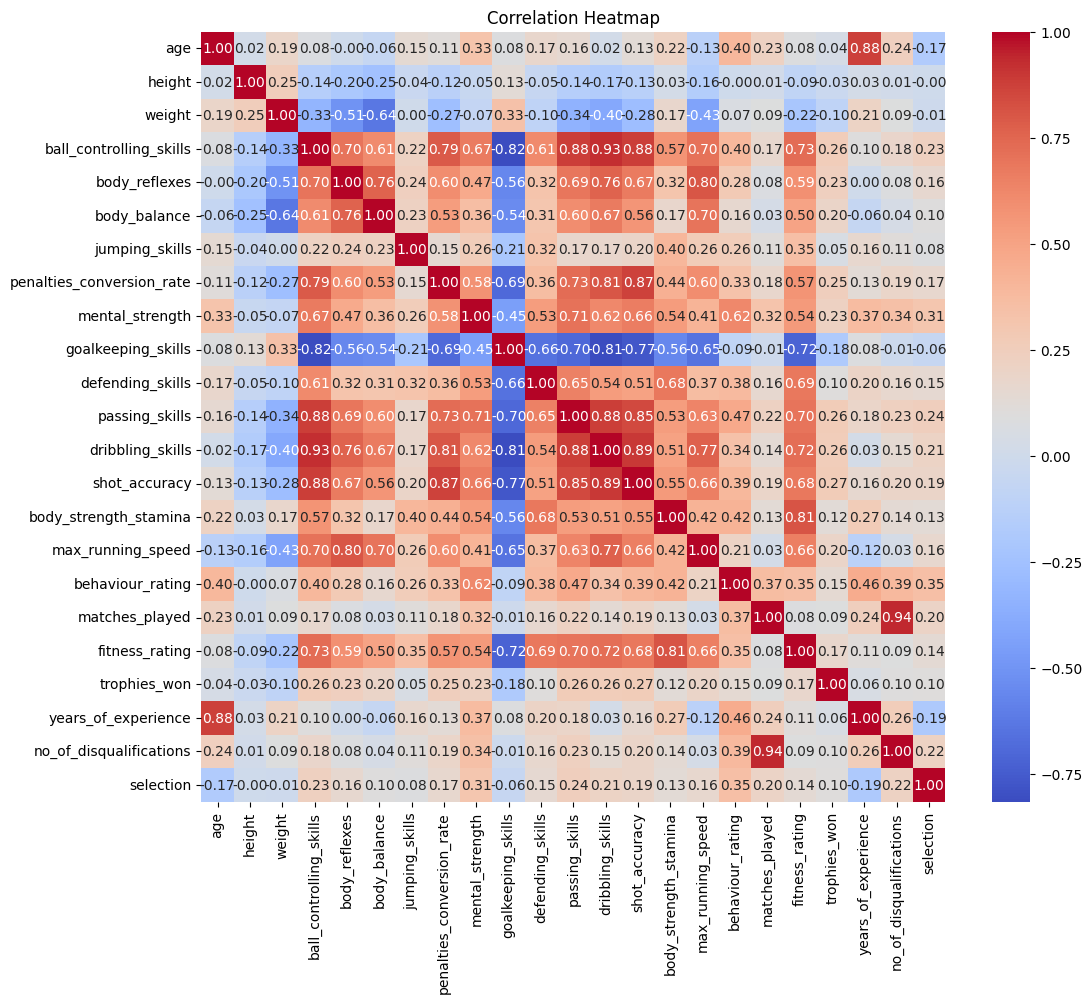

In [355]:
# Set the size of the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [356]:
col_obj=data.select_dtypes(include='object').columns
col_obj

Index(['gender', 'country', 'strong_foot', 'dedication_level', 'coaching'], dtype='object')

In [357]:
#find unique values for these columns

In [358]:
data['dedication_level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [359]:
data['strong_foot'].unique()

array(['Right', 'Any', 'Left'], dtype=object)

In [360]:
data['coaching'].unique()

array(['Talent Hunt', 'Source', 'Academy', 'Unknown'], dtype=object)

In [361]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [362]:
data['country'].unique()

array(['Ukraine', 'Russia', 'Spain', 'Chile', 'Argentina', 'Guinea',
       'China PR', 'United States', 'Italy', 'Belgium', 'Germany',
       'England', 'Colombia', 'Brazil', 'France', 'Netherlands',
       'Afghanistan', 'Sweden', 'Switzerland', 'Ghana', 'Poland',
       'Iceland', 'Bulgaria', 'Mexico', 'Northern Ireland', 'Uruguay',
       'Ivory Coast', 'Portugal', 'New Zealand', 'Norway',
       'Korea Republic', 'Scotland', 'Greece', 'Denmark', 'Slovakia',
       'Japan', 'Togo', 'Slovenia', 'Finland', 'Australia', 'Paraguay',
       'Republic of Ireland', 'Croatia', 'Saudi Arabia', 'Wales',
       'Czech Republic', 'Austria', 'Georgia', 'Gabon', 'Turkey',
       'Madagascar', 'Serbia', 'Congo', 'Tunisia', 'Canada', 'Senegal',
       'Thailand', 'Kosovo', 'Israel', 'Montserrat', 'Guatemala',
       'Algeria', 'Iraq', 'South Africa', 'Albania', 'Hungary',
       'Honduras', 'Morocco', 'Romania', 'Mali', 'Bosnia Herzegovina',
       'Ecuador', 'Burkina Faso', 'Peru', 'Kenya', 'Boli

In [363]:
# use onehot encoder for 'gender', 'strong_foot', 'dedication_level', 'coaching'

In [364]:
from sklearn.preprocessing import OneHotEncoder
# Columns to encode
columns_to_encode = ['gender', 'strong_foot', 'dedication_level', 'coaching']

# One-hot encode specified columns
encoder = OneHotEncoder(sparse=False, drop='first')  # Set drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop original columns and concatenate one-hot encoded columns
data = data.drop(columns=columns_to_encode)
data_encoded = pd.concat([data, encoded_df], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [365]:
# use binary encoder for country

In [366]:
pip install category_encoders

In [367]:
import category_encoders as ce

# Initialize the binary encoder
encoder = ce.BinaryEncoder(cols=['country'])

# Apply binary encoding to the 'country' column
data_encoded = encoder.fit_transform(data)



In [368]:
# Verify the encoding
data_encoded.head()

,age,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,height,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
0,4.795832,0,0,0,0,0,0,0,1,8.602325,...,7.071068,8.485281,4.939636,2.774887,0.000000,2.846050,2.0,2.828427,0.0,1
1,4.242641,0,0,0,0,0,0,1,0,8.366600,...,7.280110,7.348469,4.753946,2.302173,0.000000,2.607681,3.0,1.732051,0.0,0
2,4.000000,0,0,0,0,0,0,1,1,8.602325,...,7.071068,8.124038,4.816638,2.167948,0.000000,2.569047,5.0,1.414214,0.0,1
3,5.196152,0,0,0,0,0,1,0,0,8.426150,...,8.888194,8.831761,4.604346,2.932576,10.630146,2.932576,6.0,3.605551,4.0,1
4,4.358899,0,0,0,0,0,1,0,1,8.246211,...,5.916080,7.483315,4.837355,2.428992,0.000000,2.387467,5.0,2.000000,0.0,0


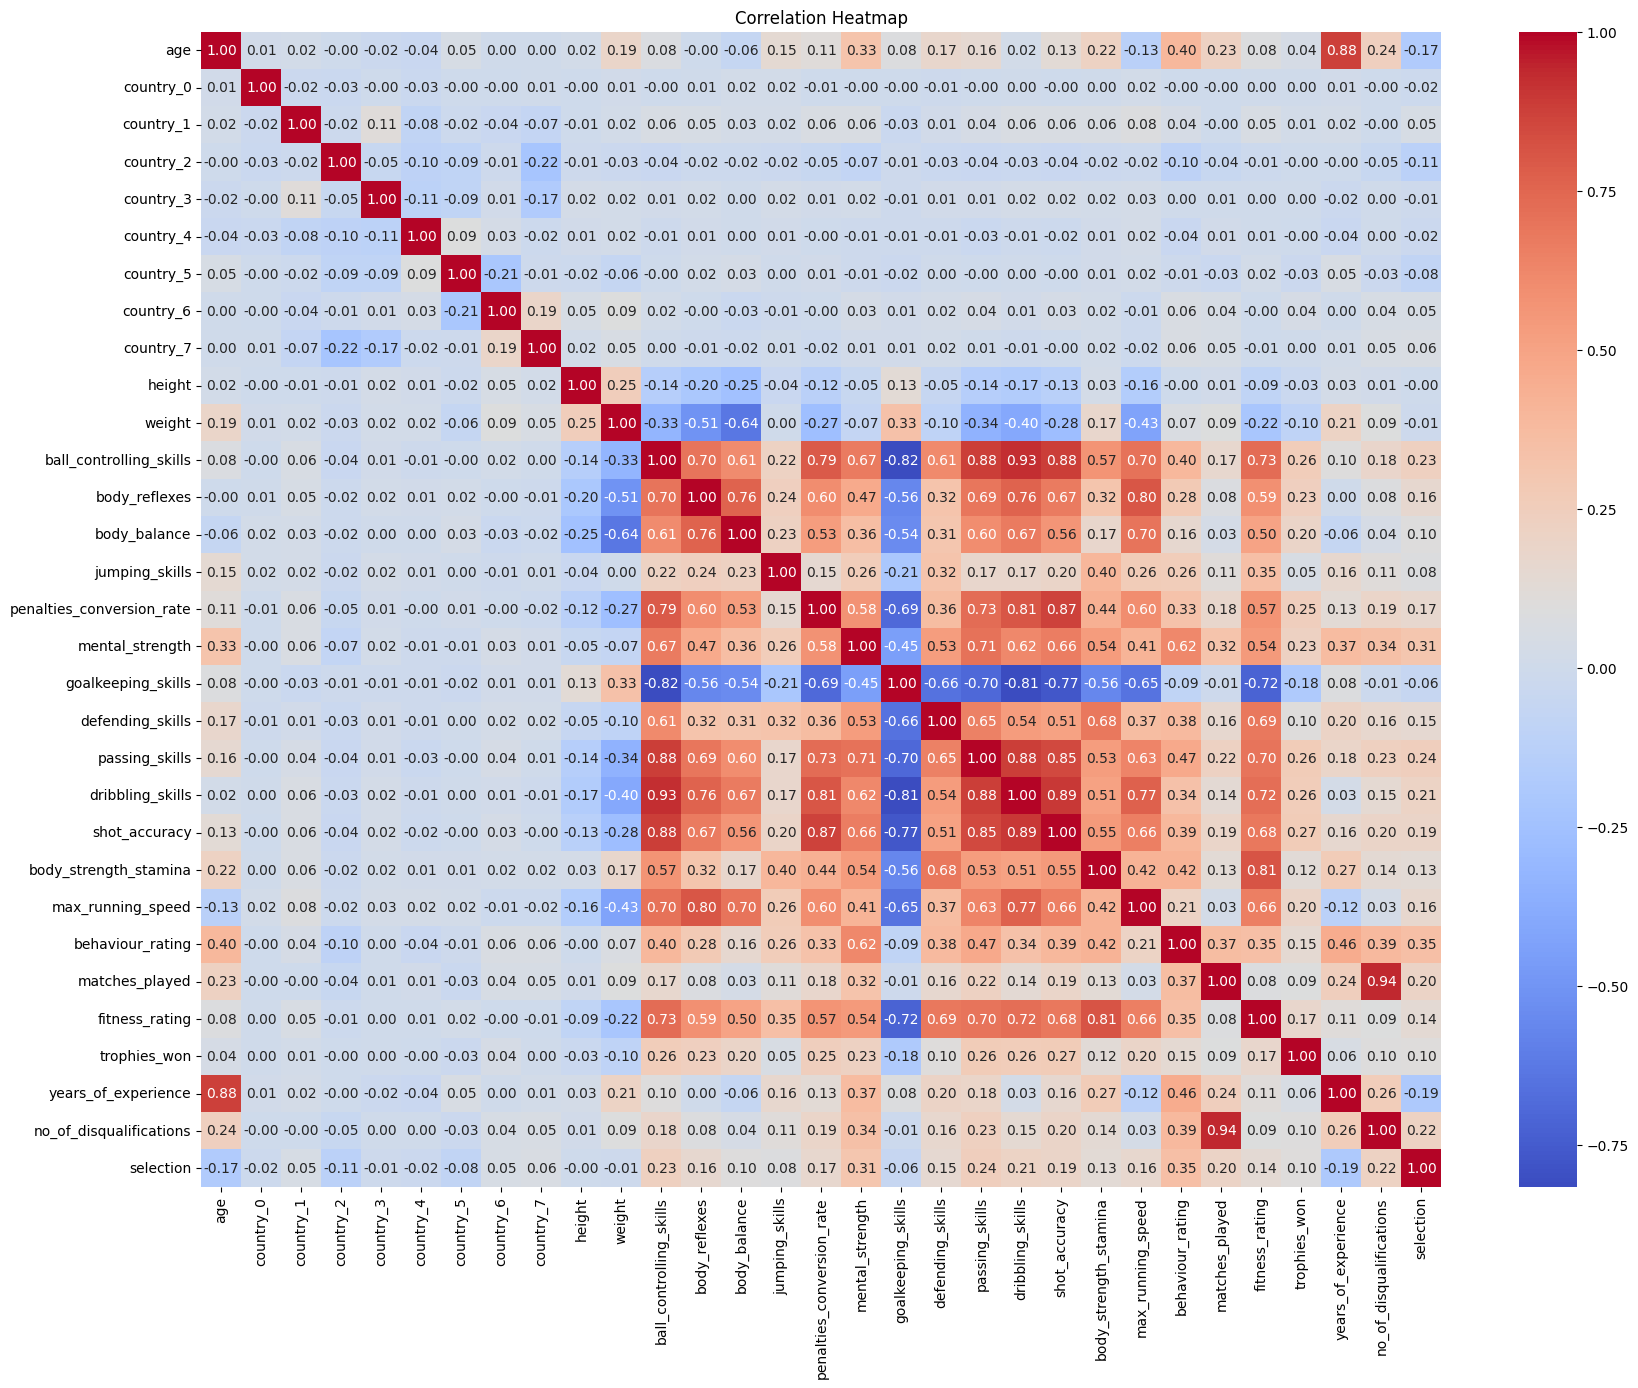

In [369]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [370]:
data_encoded['selection'].value_counts()

selection
1    7765
0    6156
Name: count, dtype: int64

In [371]:
#splitting target variable
y=data_encoded[['selection']]
X=data_encoded.drop(['selection'],axis=1)

In [372]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11136, 30) (2785, 30) (11136, 1) (2785, 1)


In [373]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [374]:
from sklearn.metrics import confusion_matrix , accuracy_score

**KNN** **CLASSIFIER**

In [375]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.7263913824057451,
 0.7023339317773788,
 0.7543985637342908,
 0.7414721723518851,
 0.7640933572710952,
 0.7565529622980252,
 0.7651705565529623,
 0.7655296229802514,
 0.7705565529622981,
 0.7709156193895871,
 0.7741472172351885,
 0.7727109515260323,
 0.7784560143626571,
 0.7795332136445242]

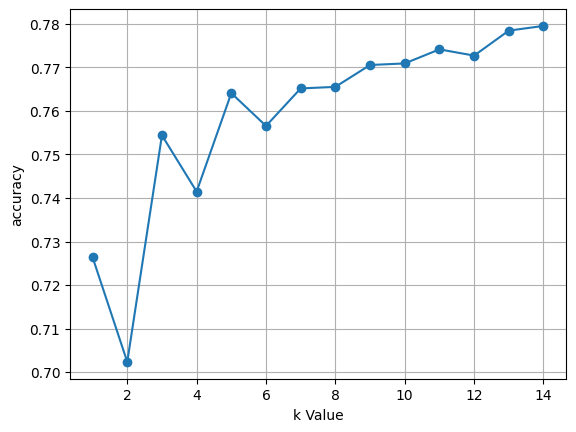

In [376]:
#plotting k vs accuracy to know which k gives maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [380]:
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [381]:
#Confusion matrix for kNN
print('Confusion Matrix :\n ',confusion_matrix(y_test,y_pred_knn))

Confusion Matrix :
  [[ 963  266]
 [ 348 1208]]


In [382]:
#Evaluation metrices
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))


KNN Accuracy is 0.7795332136445242
